# The Vitruvian man
This Jupyter Notebook is made for the TPT article *The Vitruvian man: an introduction to measurement and data-analysis*. The data is collected via google forms with three questions: Gender; Length in cm; Arm span in cm.

To save the CSV file: 
Open forms -> as spreadsheet -> download as CSV
Note that the CSV file is stored with timestamp (first column). 

An initial dataset in dataset.csv is provided to illustrate how the data-analysis can be performed.

In [57]:
# Import the required libaries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import stats

In [58]:
# Loading the data from the CSV file, column 0 with timestap is skipped
data = np.genfromtxt('dataset.csv',skip_header=1, delimiter=",",usecols=range(1,4),dtype=str)

# Show the first row and some cells to check the output
print(data[1,:])
print(data[1,0])
print(data[1,2])

#seperate data based on gender and convert str to float. 
female = data[data[:,2]=="Female",0:2].astype(float)
male = data[data[:,2]=="Male",0:2].astype(float)
unknown = data[data[:,2]=="",0:2].astype(float)
full_dataset = np.concatenate((female,male,unknown))

# Show the first row of the new array female
print(female[0,:])

['168' '168' 'Male']
168
Male
[185. 176.]


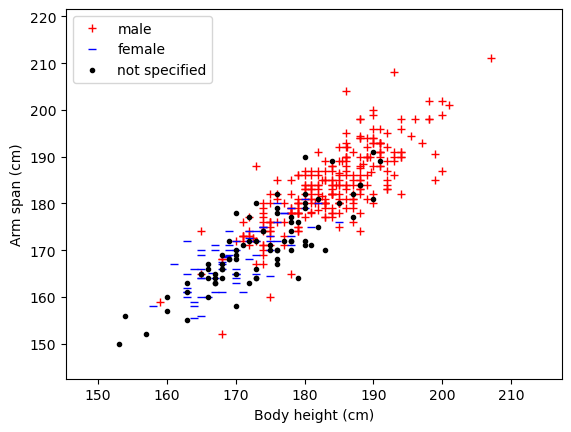

In [59]:
# A first glimpse at the data
plt.figure()
plt.xlabel('Body height (cm)')
plt.ylabel('Arm span (cm)')

plt.plot(male[:,0],male[:,1],'r+',label='male')
plt.plot(female[:,0],female[:,1],'b_',label='female')
plt.plot(unknown[:,0],unknown[:,1],'k.',label='not specified')

# setting the axis limits 
plt.xlim(0.95*np.min(full_dataset[:,0]),1.05*np.max(full_dataset[:,0]))
plt.ylim(0.95*np.min(full_dataset[:,1]),1.05*np.max(full_dataset[:,1]))
         
plt.legend()
plt.show()

In [60]:
# Fitting using a linear fit and direct proportional relation using entire dataset

def linear(x,a,b):
    return a*x+b

def direct_prop(x,a):
    return a*x

lin_var, lin_cov = curve_fit(linear,full_dataset[:,0],full_dataset[:,1])
prop_var, prop_cov = curve_fit(direct_prop,full_dataset[:,0],full_dataset[:,1])

length_dummy = np.linspace(0,1.2*max(full_dataset[:,1]),1000)
fit_lin = linear(length_dummy,*lin_var)
fit_prop = direct_prop(length_dummy,*prop_var)

residuals = full_dataset[:,1]-direct_prop(full_dataset[:,0],*prop_var)


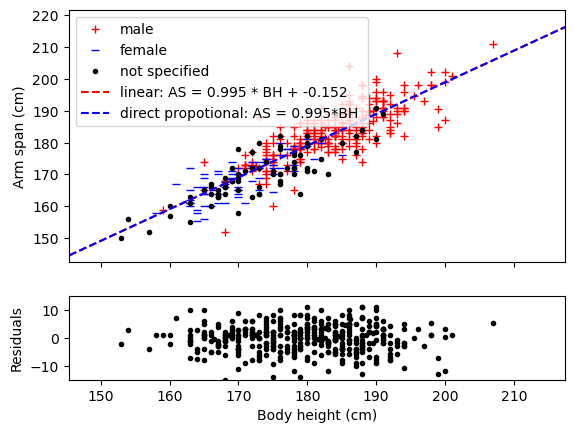

In [66]:
# Plotting the data and both fits and the residuals

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

plt.xlabel('Body height (cm)')
ax1.set_ylabel('Arm span (cm)')
ax2.set_ylabel('Residuals')

ax1.plot(male[:,0],male[:,1],'r+',label='male')
ax1.plot(female[:,0],female[:,1],'b_',label='female')
ax1.plot(unknown[:,0],unknown[:,1],'k.',label='not specified')

ax1.plot(length_dummy, fit_lin, 'r--', label='linear: AS = {:.3f} * BH + {:.3f}'.format(var1[0], var1[1]))
ax1.plot(length_dummy,fit_prop,'b--',label='direct propotional: AS = %1.3f*BH ' %var2[0])
ax1.legend()

ax2.plot(full_dataset[:,0],residuals,'k.')

plt.xlim(0.95*np.min(full_dataset[:,0]),1.05*np.max(full_dataset[:,0]))
ax1.set_ylim(0.95*np.min(full_dataset[:,1]),1.05*np.max(full_dataset[:,1]))
ax2.set_ylim(-15,15)

plt.show()

average value: -0.0004005400346063269 standard deviation 4.931398098381245


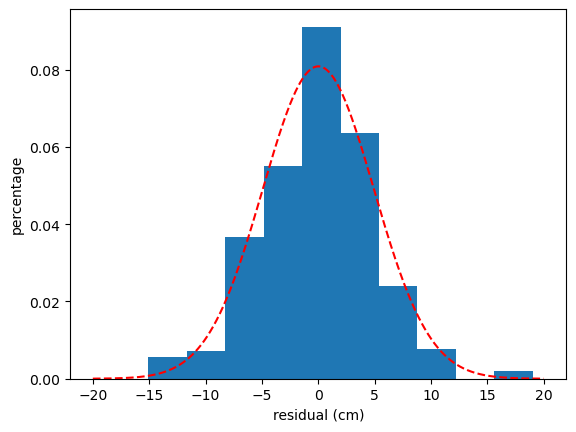

In [62]:
# Residual analysis

x_gauss = np.arange(-20, 20, 0.01)
y_gauss = stats.norm.pdf(x_gauss, np.mean(residuals), np.std(residuals))
  
print("average value:", np.mean(residuals),"standard deviation", np.std(residuals))

## plot data
plt.figure()

plt.xlabel("residual (cm)")
plt.ylabel("percentage")

plt.hist(residuals,density=True)
plt.plot(x_gauss, y_gauss,'r--')

plt.show()

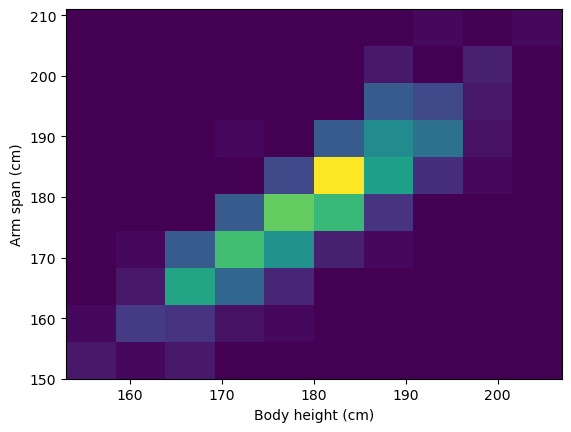

In [63]:
plt.figure()

plt.xlabel('Body height (cm)')
plt.ylabel('Arm span (cm)')

plt.hist2d(full_dataset[:,0], full_dataset[:,1],bins=10)

plt.show()

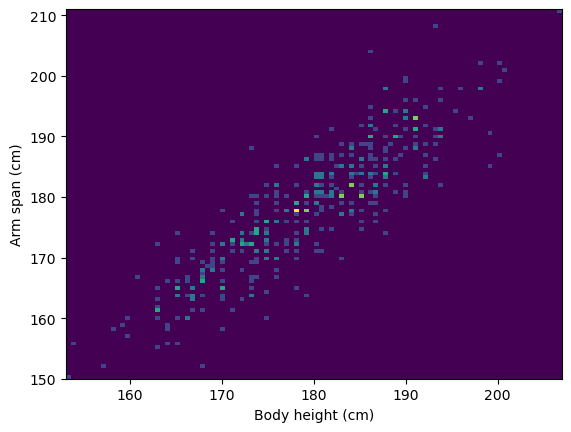

In [64]:
plt.figure()

plt.xlabel('Body height (cm)')
plt.ylabel('Arm span (cm)')

plt.hist2d(full_dataset[:,0], full_dataset[:,1],bins=100)

plt.show()